In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from IPython.display import Image
import graphviz

In [ ]:
import pandas as pd

df_1 = pd.read_csv(r'allclinical01.csv')

,ID,VERSION,V01BLDCOLL,V01BLDHRS1,V01BLDHRS2,V01BLDRAW1,V01BLDRAW2,V01BLSURD1,V01BLSURD2,V01blupmn1,...,V10ACT36C,V10ACT36D,V10ACT37A,V10ACT37B,V10ACT37C,V10ACT37D,V10ACTNAA,V10ACTNAB,V10ACTNAC,V10ACTNAD
0,9000099,1.2.2,1.0,32400.0,NaN,1.0,NaN,NaN,NaN,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9000296,1.2.2,1.0,39000.0,NaN,1.0,NaN,NaN,NaN,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9000622,1.2.2,1.0,34500.0,NaN,1.0,NaN,NaN,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9000798,1.2.2,1.0,35880.0,NaN,1.0,NaN,NaN,NaN,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9001104,1.2.2,1.0,31800.0,NaN,1.0,NaN,NaN,NaN,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,9999365,10.2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4792,9999510,10.2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4793,9999862,10.2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4794,9999865,10.2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columndf_1=list(df_1.columns)
df_1_columns=[]
for i in columndf_1:
    df_1_columns.append(i.replace("V01",""))

In [ ]:
df_1.columns=df_1_columns
df_1

,ID,VERSION,BLDCOLL,BLDHRS1,BLDHRS2,BLDRAW1,BLDRAW2,BLSURD1,BLSURD2,blupmn1,...,PA330CV,PA130CV,CEMPLOY,PASE,AGE,PA430CV,PA230CV,WKHR7CV,VISITYP,visdys
0,9000099,1.2.2,1.0,32400.0,NaN,1.0,NaN,NaN,NaN,180.0,...,0.0,0.0,1.0,119.0,60.0,3.0,0.0,50.0,1.0,370.0
1,9000296,1.2.2,1.0,39000.0,NaN,1.0,NaN,NaN,NaN,290.0,...,0.0,3.0,1.0,190.0,70.0,1.0,0.0,40.0,1.0,393.0
2,9000622,1.2.2,1.0,34500.0,NaN,1.0,NaN,NaN,NaN,275.0,...,0.0,0.0,4.0,118.0,72.0,3.0,4.0,0.0,1.0,367.0
3,9000798,1.2.2,1.0,35880.0,NaN,1.0,NaN,NaN,NaN,118.0,...,0.0,0.0,1.0,285.0,58.0,4.0,2.0,40.0,1.0,420.0
4,9001104,1.2.2,1.0,31800.0,NaN,1.0,NaN,NaN,NaN,170.0,...,0.0,0.0,4.0,157.0,73.0,1.0,0.0,0.0,1.0,370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,9999365,1.2.2,1.0,26100.0,NaN,1.0,NaN,NaN,NaN,135.0,...,3.0,0.0,1.0,242.0,57.0,3.0,3.0,35.0,1.0,356.0
4792,9999510,1.2.2,1.0,31800.0,NaN,1.0,NaN,NaN,NaN,290.0,...,0.0,0.0,1.0,NaN,51.0,2.0,0.0,60.0,1.0,385.0
4793,9999862,1.2.2,1.0,32280.0,NaN,1.0,NaN,NaN,NaN,208.0,...,0.0,4.0,4.0,215.0,62.0,2.0,1.0,16.0,1.0,371.0
4794,9999865,1.2.2,1.0,33000.0,NaN,1.0,NaN,NaN,NaN,130.0,...,0.0,2.0,4.0,82.0,62.0,2.0,2.0,4.0,1.0,373.0


In [ ]:
drop_col=list(df_1.isna().sum())
new_col=[]
final_col=list(df_1.columns)
for i in range(len(drop_col)):
    if drop_col[i]<=320:
        new_col.append(final_col[i])

In [ ]:
new_col.append('ARTH12')

In [ ]:
finalresult_new=df_1[new_col]

In [ ]:
finalresult_new=finalresult_new.dropna()

In [ ]:
finalresult_new=finalresult_new.drop('VERSION',axis=1)
finalresult_new=finalresult_new.drop('FVDATE',axis=1)
finalresult_new

,ID,BLDCOLL,CITRATE,EDTA,MRSEQNL,MRSEQNR,PAXRNA,SERUM,URNCOLL,void1,...,PSDATE,RASTAFU,SREPLKR,SREPRKR,smrielg,otreasm,mritem3,AGE,visdys,ARTH12
0,9000099,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2006-06-15,0.0,0.0,0.0,1.0,0.0,0.0,60.0,370.0,1.0
1,9000296,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2005-09-26,0.0,0.0,0.0,1.0,0.0,0.0,70.0,393.0,0.0
2,9000622,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2006-06-02,0.0,0.0,0.0,1.0,0.0,0.0,72.0,367.0,1.0
3,9000798,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2005-10-14,0.0,0.0,0.0,1.0,0.0,0.0,58.0,420.0,0.0
4,9001104,1.0,1.0,1.0,5,6,1.0,1.0,1.0,3.0,...,2006-06-15,0.0,0.0,0.0,1.0,0.0,0.0,73.0,370.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,9999365,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2005-10-21,0.0,0.0,0.0,1.0,0.0,0.0,57.0,356.0,0.0
4792,9999510,1.0,1.0,1.0,5,6,1.0,1.0,1.0,2.0,...,2007-03-12,0.0,0.0,0.0,1.0,0.0,0.0,51.0,385.0,0.0
4793,9999862,1.0,1.0,1.0,5,6,1.0,1.0,1.0,3.0,...,2006-05-18,0.0,0.0,0.0,1.0,0.0,0.0,62.0,371.0,0.0
4794,9999865,1.0,1.0,1.0,5,6,1.0,1.0,1.0,3.0,...,2006-02-17,0.0,0.0,0.0,1.0,0.0,0.0,62.0,373.0,0.0


In [ ]:
finalresult_new=finalresult_new.drop('PSDATE',axis=1)

In [ ]:
X = finalresult_new.drop('ARTH12', axis=1)
y = finalresult_new['ARTH12']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy: 0.8116279069767441


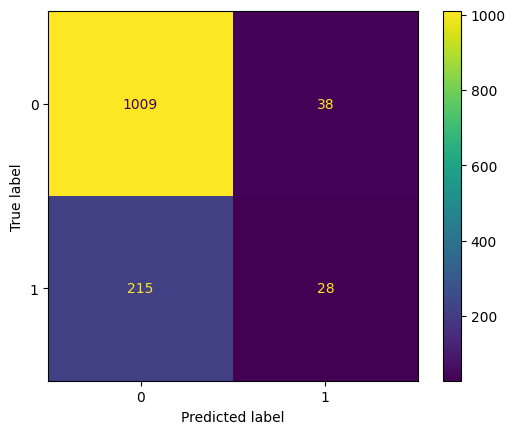

In [ ]:
y_pred = rf.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
decision_y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, decision_y_pred))

Accuracy: 0.6782945736434108


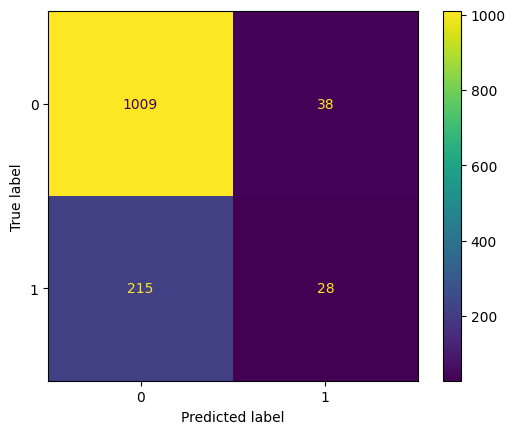

In [ ]:
decision_y_pred = rf.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8116279069767441


In [ ]:
rf = RandomForestClassifier(n_estimators=0.75,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples}

# Create a random forest classifier
rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs=-1)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
print('Best hyperparameters:',  rf_grid.best_params_)
print('Best score:',  rf_grid.best_score_)

Best hyperparameters: {'max_depth': 2, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best score: 0.8208113830216528


In [ ]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_grid, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

Best hyperparameters: {'n_estimators': 120, 'max_samples': 0.5, 'max_features': 1.0, 'max_depth': 2}


In [ ]:
print('Best hyperparameters:',  rand_search.best_params_)
print('Best score:',  rand_search.best_score_)

Best hyperparameters: {'n_estimators': 120, 'max_samples': 0.5, 'max_features': 1.0, 'max_depth': 2}
Best score: 0.8178185858563524
